# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/Users/huapinggu/Sources/NDCar/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/train.p'
validation_file='/Users/huapinggu/Sources/NDCar/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/valid.p'
testing_file = '/Users/huapinggu/Sources/NDCar/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("Load data success!")

Load data success!


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [3]:


unique, counts = np.unique(y_train, return_counts=True)
y_count_dict = dict(zip(unique, counts))

min_y_count = np.min(counts)
max_y_count = np.max(counts)

#print out all the classes
print(np.unique(y_train))

print(y_count_dict)
print(min_y_count)
print(max_y_count)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
{0: 180, 1: 1980, 2: 2010, 3: 1260, 4: 1770, 5: 1650, 6: 360, 7: 1290, 8: 1260, 9: 1320, 10: 1800, 11: 1170, 12: 1890, 13: 1920, 14: 690, 15: 540, 16: 360, 17: 990, 18: 1080, 19: 180, 20: 300, 21: 270, 22: 330, 23: 450, 24: 240, 25: 1350, 26: 540, 27: 210, 28: 480, 29: 240, 30: 390, 31: 690, 32: 210, 33: 599, 34: 360, 35: 1080, 36: 330, 37: 180, 38: 1860, 39: 270, 40: 300, 41: 210, 42: 210}
180
2010


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

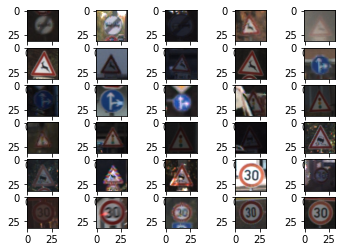

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(X_train[i*100+1])
    #print(y_train[i*1000+1])

[]

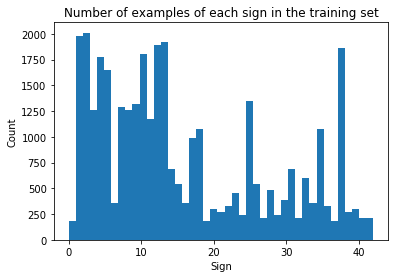

In [5]:
# Plot a histogram of the count of the number of examples of each sign
# in the test set

plt.hist(y_train, bins=n_classes)
plt.title('Number of examples of each sign in the training set')
plt.xlabel('Sign')
plt.ylabel('Count')
plt.plot()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

## Create (mock) additional data

Number of images in the train dataset =  31319
Number of images in the validation dataset =  3480


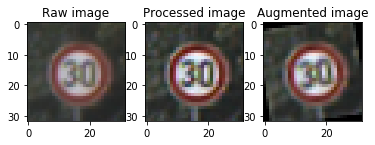

Final image size is (32, 32, 3)


In [6]:
#Augmented more mock up data
import cv2

#Some useful image functions
#Data splitting
np.random.seed(seed=123) #Set seed for reproducability
#Size of the train subset
size_train = 0.9 #80% of the given dataset
size_train = int(size_train*n_train)
#Generate a mask and subsample training and validation da tasets

img_size=X_train.shape[1]
mask=np.random.permutation(np.arange(n_train))[:size_train]
X_train_sub, y_train_sub=X_train[mask], y_train[mask]
X_validate, y_validate = np.delete(X_train, mask,0), np.delete(y_train, mask,0)
n_train_sub = len(y_train_sub)
n_validation = len(y_validate)
print("Number of images in the train dataset = ", n_train_sub)
print("Number of images in the validation dataset = ", n_validation)

  
def show3img(img, img1, img2):
    plt.figure(figsize=(6, 2))
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("Raw image")
    plt.subplot(1, 3, 2)
    plt.imshow(img1)
    plt.title("Processed image")
    plt.subplot(1, 3, 3)
    plt.imshow(img2)
    plt.title("Augmented image")
    plt.show()
    
def rotate_img(img):
    c_x,c_y = int(img.shape[0]/2), int(img.shape[1]/2)
    ang = 30.0*np.random.rand()-15
    Mat = cv2.getRotationMatrix2D((c_x, c_y), ang, 1.0)
    return cv2.warpAffine(img, Mat, img.shape[:2])

def sharpen_img(img):
    gb = cv2.GaussianBlur(img, (5,5), 20.0)
    return cv2.addWeighted(img, 2, gb, -1, 0)

def contr_img(img, s=1.0):
    m=127.0*(1.0-s)
    return lin_img(img, s, m)

def lin_img(img, s=1.0, m=0.0):
    img2=cv2.multiply(img, np.array([s]))
    return cv2.add(img2, np.array([m]))

def transform_img(img):
    img2=sharpen_img(img)
    #img2=crop(img2,3)
    #img2=contr_img(img2, 1.5)
    #return eq_Hist(img2)
    return img2

def augment_img(img):
    #img=contr_img(img, 1.8*np.random.rand()+0.2)
    img=rotate_img(img)
    #img=scale_img(img)
    return transform_img(img)

x_selected = X_train[y_train == 1]
im=x_selected[160, :, :, :]
imp=contr_img(im, 0.5)

show3img(im, transform_img(im), augment_img(im))
print("Final image size is", transform_img(im).shape)


In [22]:
#generate mock data
from tqdm import tqdm

X_train_aug = []
y_train_aug = []

X_valid_aug = []
y_valid_aug = []

X_test_aug = []
y_test_aug = []

def create_data(n=10):
    for i in tqdm(range(int(n_train_sub))):        
        img=X_train_sub[i]
        X_train_aug.append(transform_img(img))
        y_train_aug.append(y_train_sub[i])
        
        #Generate n new images out of each input image, based on the max_y_count
        y_count = y_count_dict[y_train_sub[i]]        
        nn = 2* max_y_count//y_count
    
        for j in range(nn):
            X_train_aug.append(augment_img(img))
            y_train_aug.append(y_train_sub[i])       
    for i in range(n_validation):
        img=X_validate[i]
        X_valid_aug.append(transform_img(img))
        y_valid_aug.append(y_validate[i])
        
    for i in range(n_test):
        img=X_test[i]
        #X_test_aug.append(transform_img(img))
        X_test_aug.append(img)
        y_test_aug.append(y_test[i])

create_data(3)
print("Total number of images in the augmented train dataset = ", len(X_train_aug))
print("Total number of images in the augmented validate dataset = ", len(X_valid_aug))

X_train = np.array(X_train_aug)
y_train = np.array(y_train_aug)

X_valid = np.array(X_valid_aug)
y_valid = np.array(y_valid_aug)

X_test = np.array(X_test_aug)
y_test = np.array(y_test_aug)

print("Total number of images in the X_train dataset = ", len(X_train))
print("Total number of images in the X_validate dataset = ", len(X_valid))



print("Total number of images in the X_test dataset = ", len(X_test))
print("Total number of images in the X_test dataset = ", len(X_test))

100%|██████████| 31319/31319 [00:05<00:00, 6073.13it/s]


Total number of images in the augmented train dataset =  176767
Total number of images in the augmented validate dataset =  3480
Total number of images in the X_train dataset =  176767
Total number of images in the X_validate dataset =  3480
Total number of images in the X_test dataset =  12630
Total number of images in the X_test dataset =  12630


In [8]:
print(X_train[0].shape)

(32, 32, 3)


[]

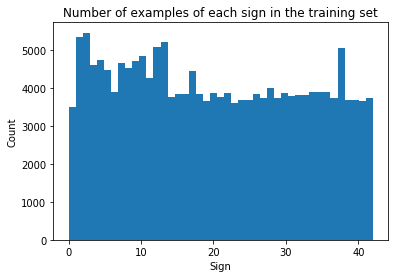

In [9]:
# Plot a histogram of the count of the number of examples of each sign
# in the test set

plt.hist(y_train, bins=n_classes)
plt.title('Number of examples of each sign in the training set')
plt.xlabel('Sign')
plt.ylabel('Count')
plt.plot()

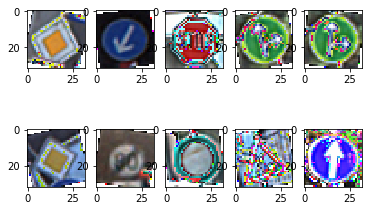

In [10]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.


def normalize_data(x):
    #x = (x - x.mean()) / (np.max(x) - np.min(x))
    x = (x - 128)/128
    #return (x.astype('float32') / 255.) - 0.5 
    return x

#X_train = normalize_data(X_train)
#X_valid = normalize_data(X_valid)
#X_test = normalize_data(X_test)

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i*10+1])
     

### Model Architecture

In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def conv2d(x, W, b, strides, padding):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k, padding):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding=padding)

    
# Input = 32x32x3
# Hyperparameters
mu = 0
sigma = 0.1
W1 = tf.Variable(tf.truncated_normal([5, 5, 3, 6], mean = mu, stddev = sigma), name='W1')
W2 = tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean = mu, stddev = sigma), name='W2')
W_fc1 = tf.Variable(tf.truncated_normal([400, 120], mean = mu, stddev = sigma), name='W_fc1')
W_fc2 = tf.Variable(tf.truncated_normal([120, 84], mean = mu, stddev = sigma), name='W_fc2')
W_fc3 = tf.Variable(tf.truncated_normal([84, 43], mean = mu, stddev = sigma), name='W_fc3')


def LeNet(x):

    
    #x_gray = tf.image.rgb_to_grayscale(x)
    
    ### Layer 1:
    # Convolutional. Output = 28x28x6
    # Pooling. Output = 14x14x6

    b1 = tf.Variable(tf.zeros(6), name='b1')
    
    #width=height=ceil((32-5)/1 + 1) = 28
    layer1 = conv2d(x, W1, b1, 1, 'VALID')
    
    #
    pool1 = tf.nn.dropout(maxpool2d(layer1, 2, 'VALID'), keep_prob_conv)

    ### Layer 2:
    # Convolutional: Output = 10x10x16
    # Pooling. Output = 5x5x16

    b2 = tf.Variable(tf.zeros(16), name='b2')
    layer2 = conv2d(pool1, W2, b2, 1, 'VALID')
    pool2 = tf.nn.dropout(maxpool2d(layer2, 2, 'VALID'), keep_prob_conv)
    
    ### Layer 3:
    # Fully Connected. Output = 120
    fc = flatten(pool2)

    b_fc1 = tf.Variable(tf.zeros(120), name='b_fc1')
    fc1 = tf.nn.relu(tf.add(tf.matmul(fc, W_fc1), b_fc1))
    fc1_drop = tf.nn.dropout(fc1, keep_prob)

    ### Layer 4
    # Fully Connected. Output = 84

    b_fc2 = tf.Variable(tf.zeros(84), name='b_fc2')
    fc2 = tf.nn.relu(tf.add(tf.matmul(fc1_drop, W_fc2), b_fc2))
    fc2_drop = tf.nn.dropout(fc2, keep_prob)
    

    ### Layer 5
    # Fully Connected. Output = n_classes

    b_fc3 = tf.Variable(tf.zeros(43), name='b_fc3')
    logits = tf.add(tf.matmul(fc2_drop, W_fc3), b_fc3)
    
    return logits

## Features and Labels


In [12]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob_conv = tf.placeholder(tf.float32)
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

## Loss Function and Learning Parameters

## evaluation

In [13]:
rate = 0.001
BATCH_SIZE = 128
EPOCHS = 30

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [14]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1, keep_prob_conv:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Training

### Train, Validate and Test the Model

In [15]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
from tqdm import tqdm

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    
    num_examples = len(X_train)
    
    print("Training...")
    print(num_examples)
    print()
    for i in range(EPOCHS):
        print("EPOCH " + str(i+1))
        X_train, y_train = shuffle(X_train, y_train)
        for offset in tqdm(range(0, num_examples, BATCH_SIZE)):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0, keep_prob_conv:1.0})
            #break
         
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        #break
    
    import os
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    save_path='model1/model'
    if not os.path.isabs(save_path):
        save_path = os.path.abspath(os.path.join(os.getcwd(), save_path))
    saver.save(sess, save_path)
    print("Model saved")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Training...
176767

EPOCH 1


100%|██████████| 1381/1381 [01:56<00:00, 11.86it/s]


Training Accuracy = 0.850
Validation Accuracy = 0.785

EPOCH 2


100%|██████████| 1381/1381 [01:51<00:00, 12.33it/s]


Training Accuracy = 0.921
Validation Accuracy = 0.868

EPOCH 3


100%|██████████| 1381/1381 [01:53<00:00, 12.42it/s]


Training Accuracy = 0.950
Validation Accuracy = 0.901

EPOCH 4


100%|██████████| 1381/1381 [01:51<00:00, 13.50it/s]


Training Accuracy = 0.960
Validation Accuracy = 0.908

EPOCH 5


100%|██████████| 1381/1381 [01:47<00:00, 12.20it/s]


Training Accuracy = 0.970
Validation Accuracy = 0.920

EPOCH 6


100%|██████████| 1381/1381 [01:53<00:00, 12.56it/s]


Training Accuracy = 0.970
Validation Accuracy = 0.922

EPOCH 7


100%|██████████| 1381/1381 [01:47<00:00, 12.01it/s]


Training Accuracy = 0.980
Validation Accuracy = 0.931

EPOCH 8


100%|██████████| 1381/1381 [01:43<00:00, 13.66it/s]


Training Accuracy = 0.987
Validation Accuracy = 0.936

EPOCH 9


100%|██████████| 1381/1381 [01:50<00:00, 12.79it/s]


Training Accuracy = 0.977
Validation Accuracy = 0.927

EPOCH 10


100%|██████████| 1381/1381 [01:42<00:00, 13.60it/s]


Training Accuracy = 0.985
Validation Accuracy = 0.936

EPOCH 11


100%|██████████| 1381/1381 [01:54<00:00, 11.76it/s]


Training Accuracy = 0.988
Validation Accuracy = 0.941

EPOCH 12


100%|██████████| 1381/1381 [01:50<00:00, 12.54it/s]


Training Accuracy = 0.990
Validation Accuracy = 0.941

EPOCH 13


100%|██████████| 1381/1381 [01:47<00:00, 12.51it/s]


Training Accuracy = 0.974
Validation Accuracy = 0.928

EPOCH 14


100%|██████████| 1381/1381 [01:48<00:00, 11.19it/s]


Training Accuracy = 0.985
Validation Accuracy = 0.930

EPOCH 15


100%|██████████| 1381/1381 [01:52<00:00, 12.26it/s]


Training Accuracy = 0.991
Validation Accuracy = 0.945

EPOCH 16


100%|██████████| 1381/1381 [02:14<00:00, 10.26it/s]


Training Accuracy = 0.983
Validation Accuracy = 0.933

EPOCH 17


100%|██████████| 1381/1381 [01:46<00:00, 13.59it/s]


Training Accuracy = 0.990
Validation Accuracy = 0.942

EPOCH 18


100%|██████████| 1381/1381 [01:45<00:00, 13.08it/s]


Training Accuracy = 0.992
Validation Accuracy = 0.946

EPOCH 19


100%|██████████| 1381/1381 [02:30<00:00, 14.02it/s] 


Training Accuracy = 0.990
Validation Accuracy = 0.938

EPOCH 20


100%|██████████| 1381/1381 [01:56<00:00, 11.59it/s]


Training Accuracy = 0.986
Validation Accuracy = 0.939

EPOCH 21


100%|██████████| 1381/1381 [02:06<00:00, 10.92it/s]


Training Accuracy = 0.986
Validation Accuracy = 0.937

EPOCH 22


100%|██████████| 1381/1381 [01:56<00:00, 11.88it/s]


Training Accuracy = 0.992
Validation Accuracy = 0.944

EPOCH 23


100%|██████████| 1381/1381 [01:52<00:00, 12.50it/s]


Training Accuracy = 0.990
Validation Accuracy = 0.940

EPOCH 24


100%|██████████| 1381/1381 [01:52<00:00, 12.14it/s]


Training Accuracy = 0.988
Validation Accuracy = 0.942

EPOCH 25


100%|██████████| 1381/1381 [02:07<00:00,  9.78it/s]


Training Accuracy = 0.994
Validation Accuracy = 0.951

EPOCH 26


100%|██████████| 1381/1381 [01:44<00:00, 15.31it/s]


Training Accuracy = 0.993
Validation Accuracy = 0.949

EPOCH 27


100%|██████████| 1381/1381 [01:48<00:00, 13.01it/s]


Training Accuracy = 0.995
Validation Accuracy = 0.942

EPOCH 28


100%|██████████| 1381/1381 [01:48<00:00, 11.29it/s]


Training Accuracy = 0.992
Validation Accuracy = 0.940

EPOCH 29


100%|██████████| 1381/1381 [01:52<00:00, 12.50it/s]


Training Accuracy = 0.995
Validation Accuracy = 0.948

EPOCH 30


100%|██████████| 1381/1381 [01:50<00:00, 12.18it/s]


Training Accuracy = 0.995
Validation Accuracy = 0.948

Model saved
Test Accuracy = 0.766


A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [24]:
with tf.Session() as sess:
    saver.restore(sess, './model1/model')
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.614


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Speed limit (20km/h)
Speed limit (30km/h)
Speed limit (50km/h)
Speed limit (60km/h)
Speed limit (70km/h)
Speed limit (80km/h)
End of speed limit (80km/h)
Speed limit (100km/h)
Speed limit (120km/h)
No passing
No passing for vehicles over 3.5 metric tons
Right-of-way at the next intersection
Priority road
Yield
Stop
No vehicles
Vehicles over 3.5 metric tons prohibited
No entry
General caution
Dangerous curve to the left
Dangerous curve to the right
Double curve
Bumpy road
Slippery road
Road narrows on the right
Road work
Traffic signals
Pedestrians
Children crossing
Bicycles crossing
Beware of ice/snow
Wild animals crossing
End of all speed and passing limits
Turn right ahead
Turn left ahead
Ahead only
Go straight or right
Go straight or left
Keep right
Keep left
Roundabout mandatory
End of no passing
End of no passing by vehicles over 3.5 metric tons


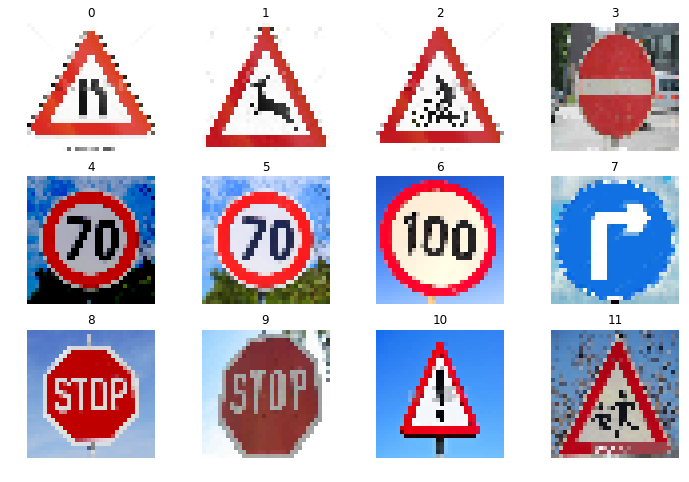

In [25]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import csv
import glob
#Import traffic signs class names
signs_class=[]
%matplotlib inline

num_of_samples=[]


with open('signnames.csv', 'rt') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        signs_class.append((row['SignName']))
        
for clazz in signs_class:        
    print(clazz)        

#Import test images  
test_img_paths = [img_path for img_path in glob.glob("/Users/huapinggu/Sources/NDCar/CarND-Traffic-Sign-Classifier-Project/test-images/*")]
test_img=np.uint8(np.zeros((12,32,32,3)))
for i, imp in enumerate(test_img_paths):
    img=cv2.imread(imp, cv2.IMREAD_COLOR)
    img=cv2.resize(img, (32,32))
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    test_img[i]=img

#Visualize new raw images
plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(test_img[i]) 
    plt.title(i)
    plt.axis('off')
    num_of_samples.append(len(x_selected))
plt.show()

In [26]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
def test_net(X_data):
    sess = tf.get_default_session()
    pred_sign = sess.run(tf.argmax(logits, 1), feed_dict={x: X_data, keep_prob:1, keep_prob_conv:1})
    return pred_sign



### Predict the Sign Type for Each Image

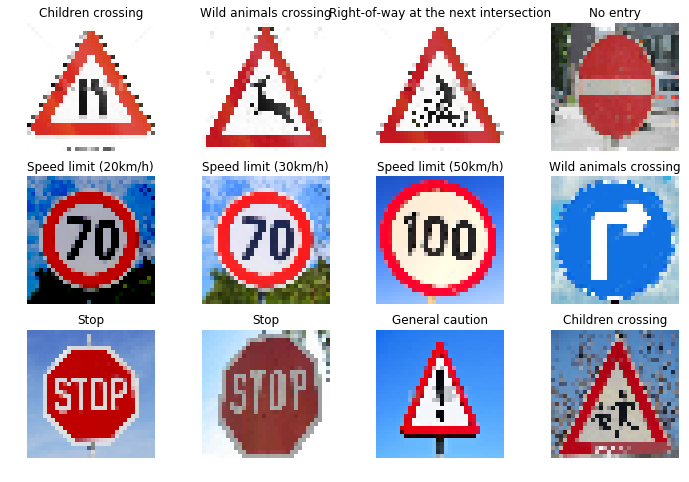

In [27]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
X_test_data=np.uint8(np.zeros((12,32,32,3)))
for i in range(12):
    img=test_img[i]
    X_test_data[i]=transform_img(img)
    X_test_data[i] = normalize_data(X_test_data[i])

X_test_data = X_test_data.reshape((-1, 32, 32, 3)).astype(np.float32)
    
    
with tf.Session() as sess:
    saver.restore(sess, './model1/model')
    signs_classes=test_net(X_test_data)


plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(test_img[i]) 
    plt.title(signs_class[signs_classes[i]])
    plt.axis('off')
plt.show()

### Analyze Performance

In [28]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
y_test = [24,31,29,17,4,4,7,33,14,14,18,28]

with tf.Session() as sess:
    saver.restore(sess, './model1/model')
    test_accuracy = evaluate(X_test_data, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
   

Test Accuracy = 0.500


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

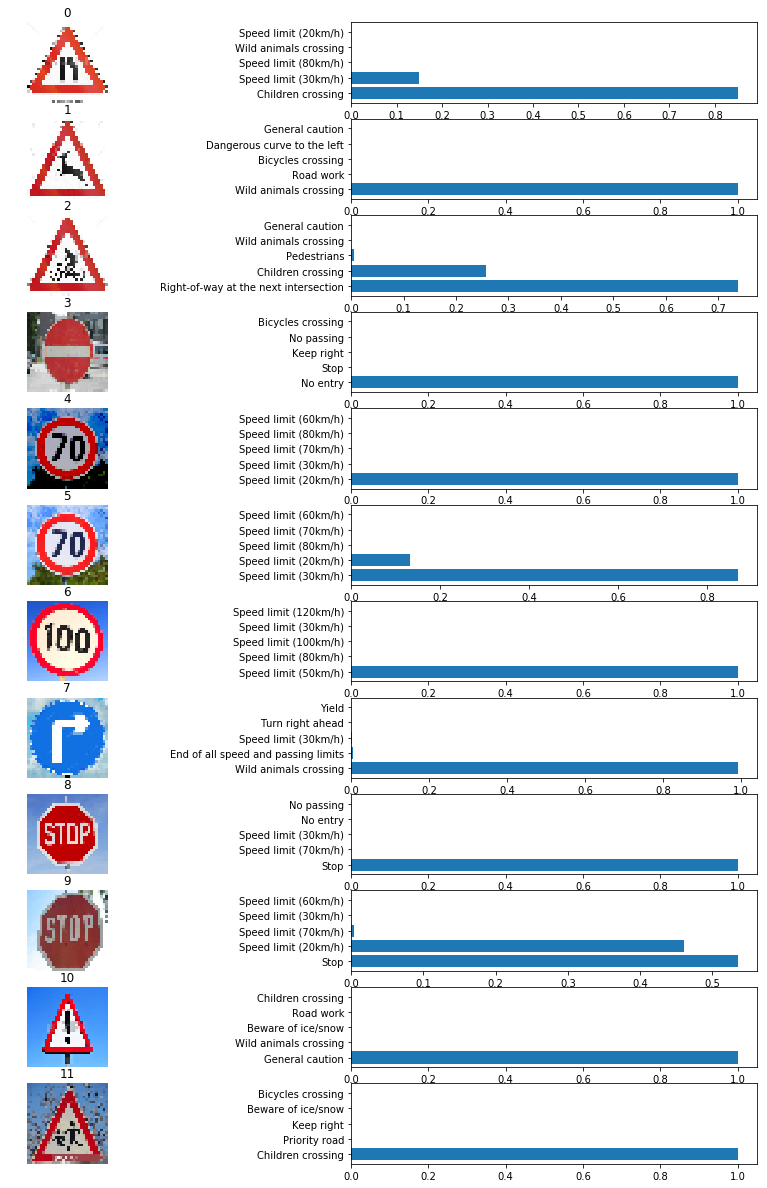

In [29]:
def test_top_5_net(X_data): 
    sess = tf.get_default_session()
    prob = sess.run(tf.nn.softmax(logits), feed_dict={x: X_data, keep_prob: 1.0, keep_prob_conv:1.0})    
    top_5 = tf.nn.top_k(prob, k=5)
    return sess.run(top_5)


with tf.Session() as sess:
    saver.restore(sess, './model1/model')
    signs_top_5=test_top_5_net(X_test_data)
    

plt.figure(figsize=(16, 21))
for i in range(12):
    plt.subplot(12, 2, 2*i+1)
    plt.imshow(test_img[i]) 
    plt.title(i)
    plt.axis('off')
    plt.subplot(12, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), signs_top_5.values[i, :])
    labs=[signs_class[j] for j in signs_top_5.indices[i]]
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()    

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


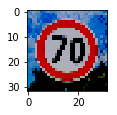

(32, 32, 3)
(1, 32, 32, 3)


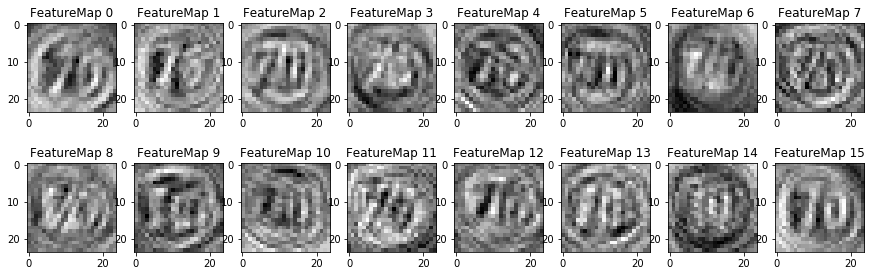

In [30]:
def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

            
plt.figure(figsize=(16, 21))

mu = 0
sigma = 0.1

# SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.zeros(6))
conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b


# SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.zeros(16))
conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b


with tf.Session() as sess:
    saver.restore(sess, './model1/model')
    plt.subplot(12, 2, 2*i+1)
    
    original_test_img = test_img[4]
    plt.imshow(original_test_img)
    plt.show()   
    print(original_test_img.shape)
    

    sess.run(tf.global_variables_initializer())
    X_test_img = original_test_img.reshape((-1, 32, 32, 3)).astype(np.float32)
    print(X_test_img.shape)
    tf_conv1 = sess.run(conv1, feed_dict={x: X_test_img})
    outputFeatureMap(X_test_img, conv1)
    
    outputFeatureMap(X_test_img, conv2)

    #outputFeatureMap(test_img[1],W1)
    #outputFeatureMap(test_img[1],W2)


plt.show()            